# Employee Salary Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#### Importing the data

In [2]:
df = pd.read_csv(r'employee_data_train.csv')

In [3]:
# A quick look at the data
df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
# Checking the datatype of every field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   companyId            20000 non-null  object
 1   jobType              20000 non-null  object
 2   degree               20000 non-null  object
 3   major                20000 non-null  object
 4   industry             20000 non-null  object
 5   yearsExperience      20000 non-null  int64 
 6   milesFromMetropolis  20000 non-null  int64 
 7   salary               20000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


#### There are three fields of int datatype and five object datatypes.

In [5]:
# Checking for null values in the data
df.isnull().sum()

companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

#### There are no null values in the data.

#### The companyId field should be dropped as it has little effect on the salary. 

In [6]:
df.drop('companyId', inplace=True, axis=1)

## Separating dependant and independant variables

In [7]:
y = df['salary']
X = df.iloc[:,:-1]

In [8]:
X.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,CFO,MASTERS,MATH,HEALTH,10,83
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


## Splitting the data into train and test samples

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Handing categorical data

 1. Nominal data - OneHotEncoding can be done
 2. Ordinal data - LabelEncoding must be done

In [11]:
# First let us consider jobType column
X_train['jobType'].value_counts()

SENIOR            2127
VICE_PRESIDENT    2013
CEO               1997
MANAGER           1989
CTO               1984
JANITOR           1978
JUNIOR            1960
CFO               1952
Name: jobType, dtype: int64

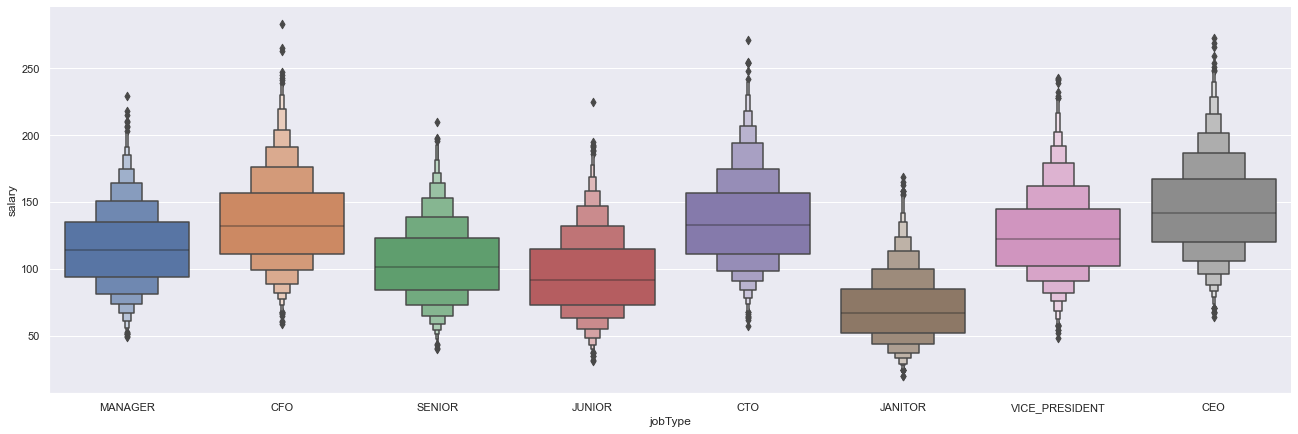

In [12]:
sns.catplot(y = y, x = "jobType", data = X_train, kind="boxen", height = 6, aspect = 3)
plt.show()

#### As  can be seen, there is not much of a difference between median salaries of different categories, except janitor and junior. So OneHotEncoding would be suitable in this case.

In [13]:
job_type = pd.get_dummies(X_train[['jobType']], drop_first=True)

job_type.head()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
17815,0,0,0,0,1,0,0
18370,1,0,0,0,0,0,0
1379,0,0,0,0,0,1,0
14763,0,0,0,1,0,0,0
7346,0,1,0,0,0,0,0


In [14]:
# Checking the degree column
X_train['degree'].value_counts()

NONE           3840
HIGH_SCHOOL    3721
BACHELORS      2839
DOCTORAL       2804
MASTERS        2796
Name: degree, dtype: int64

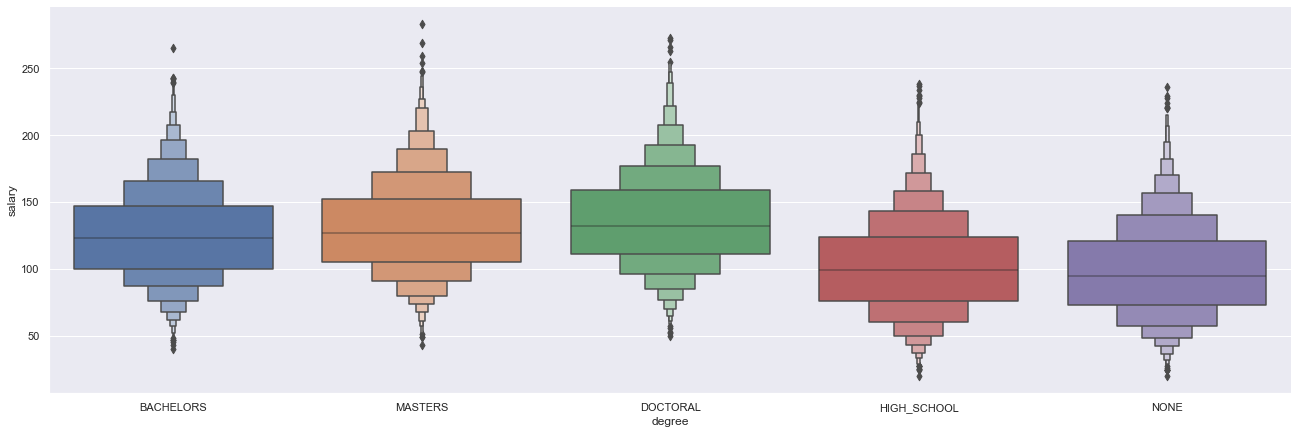

In [15]:
sns.catplot(y = y, x = "degree", data = X_train, kind="boxen", height = 6, aspect = 3)
plt.show()

#### In this case too, we can perform OneHotEncoding as the salary brackets of people with different degrees cannot be clearly separated. 

In [16]:
degree_type = pd.get_dummies(X_train[['degree']], drop_first=True)

degree_type.head()

,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE
17815,0,0,0,0
18370,0,0,1,0
1379,1,0,0,0
14763,0,0,0,0
7346,1,0,0,0


In [17]:
# Now let us consider the major colummn
X_train['major'].value_counts()

NONE           8518
MATH           1008
CHEMISTRY       968
ENGINEERING     950
LITERATURE      940
BUSINESS        933
PHYSICS         930
BIOLOGY         895
COMPSCI         858
Name: major, dtype: int64

In [18]:
# As there is no discrimation based on the major, we can use OneHotEncoding here
major_types = pd.get_dummies(X_train[['major']], drop_first=True)

major_types.head()

,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS
17815,0,0,0,0,0,0,0,0
18370,1,0,0,0,0,0,0,0
1379,0,0,0,0,1,0,0,0
14763,0,0,0,0,1,0,0,0
7346,0,0,1,0,0,0,0,0


In [19]:
# Finally the last categorical column left is industry
X_train['industry'].value_counts()

HEALTH       2333
FINANCE      2306
WEB          2279
SERVICE      2277
OIL          2276
EDUCATION    2266
AUTO         2263
Name: industry, dtype: int64

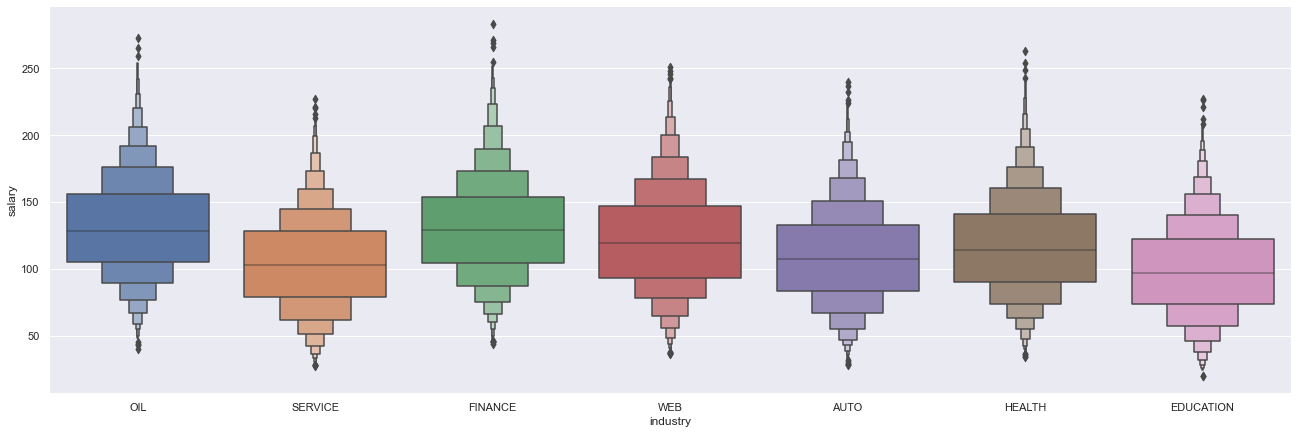

In [20]:
# Checking the variation of median salary according to industry
sns.catplot(y = y, x = "industry", data = X_train, kind="boxen", height = 6, aspect = 3)
plt.show()

#### According to the catplot, the industry wise median salary variation is very less, so OneHotEncoding can be used.

In [21]:
industry_type = pd.get_dummies(X_train[['industry']], drop_first=True)

industry_type.head()

,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
17815,0,0,0,1,0,0
18370,0,0,0,0,1,0
1379,0,0,0,1,0,0
14763,0,1,0,0,0,0
7346,0,0,0,0,1,0


In [22]:
# Adding all the one hot encoded columns to the main dataframe
X_train_new = pd.concat([X_train, job_type, degree_type, major_types, industry_type], axis = 1)

X_train_new.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
17815,MANAGER,BACHELORS,BIOLOGY,OIL,12,71,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18370,CFO,MASTERS,BUSINESS,SERVICE,18,32,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1379,SENIOR,DOCTORAL,LITERATURE,OIL,16,19,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
14763,JUNIOR,BACHELORS,LITERATURE,FINANCE,7,42,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
7346,CTO,DOCTORAL,COMPSCI,SERVICE,1,22,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# As the one hot encoding is done, the redundant categorical columns can be removed
X_train_new.drop(['jobType', 'degree', 'major', 'industry'], axis=1, inplace = True)

X_train_new.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
17815,12,71,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18370,18,32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1379,16,19,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
14763,7,42,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
7346,1,22,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Repeating the same process for X_test

In [24]:
job_type = pd.get_dummies(X_test[['jobType']], drop_first=True)
degree_type = pd.get_dummies(X_test[['degree']], drop_first=True)
major_types = pd.get_dummies(X_test[['major']], drop_first=True)
industry_type = pd.get_dummies(X_test[['industry']], drop_first=True)
X_test_new = pd.concat([X_test, job_type, degree_type, major_types, industry_type], axis = 1)
X_test_new.drop(['jobType', 'major', 'degree', 'industry'], axis=1, inplace = True)

X_test_new.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
19134,20,89,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4981,17,38,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
16643,10,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
19117,12,44,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5306,24,88,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


## Test data

In [25]:
test_data = pd.read_csv(r'employee_data_test.csv')

In [26]:
test_data.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [27]:
# Following the same procedure for test data
test_data.drop('companyId', inplace=True, axis=1)
job_type = pd.get_dummies(test_data[['jobType']], drop_first=True)
degree_type = pd.get_dummies(test_data[['degree']], drop_first=True)
major_types = pd.get_dummies(test_data[['major']], drop_first=True)
industry_type = pd.get_dummies(test_data[['industry']], drop_first=True)
data_test = pd.concat([test_data, job_type, degree_type, major_types, industry_type], axis = 1)
data_test.drop(['jobType', 'major', 'degree', 'industry'], axis=1, inplace = True)

data_test.head()

,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,22,73,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,20,47,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,17,9,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,10,44,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection

#### For feature selection we can use:
1. heatmap
2. feature_importance_
3. SelectKBest

In [28]:
x_num = pd.concat([X_train_new[['yearsExperience', 'milesFromMetropolis']], y_train], axis=1)

x_num.head()

,yearsExperience,milesFromMetropolis,salary
17815,12,71,90
18370,18,32,227
1379,16,19,130
14763,7,42,79
7346,1,22,101


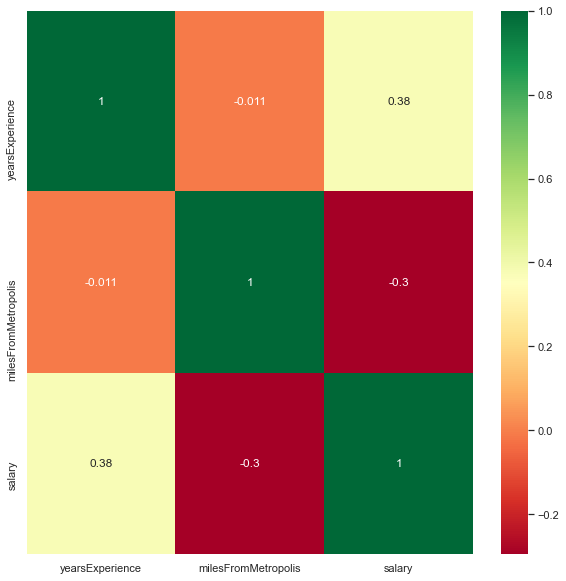

In [29]:
# Checking the correlation between independant and dependant variables
plt.figure(figsize = (10,10))
sns.heatmap(x_num.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [30]:
# Checking important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor(n_jobs=-1)
selection.fit(X_train_new, y_train)

ExtraTreesRegressor(n_jobs=-1)

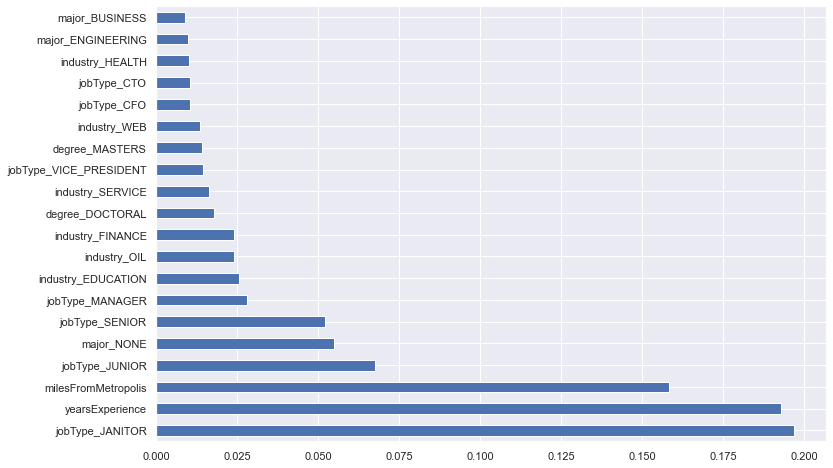

In [31]:
# For beter visualization we can plot the results

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train_new.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

##  Using RandomForestRegressor

1. Import model
2. Fit the data
3. Predict w.r.t X_test
4. In regression check RSME Score
5. Plot graph

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_jobs=-1)
rf_reg.fit(X_train_new, y_train)

RandomForestRegressor(n_jobs=-1)

In [33]:
y_pred = rf_reg.predict(X_test_new)

In [34]:
rf_reg.score(X_train_new, y_train)

0.9581514739385713

In [35]:
rf_reg.score(X_test_new, y_test)

0.7161951160296904

C:\Users\Samarth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


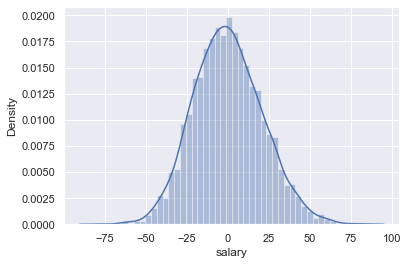

In [36]:
sns.distplot(y_test-y_pred)
plt.show()

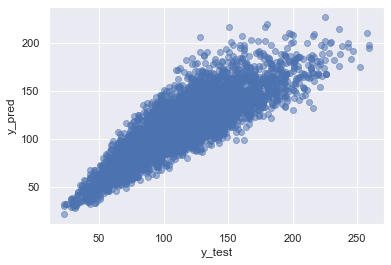

In [37]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.67644864285714
MSE: 437.95699705541074
RMSE: 20.927422131151527


In [40]:
metrics.r2_score(y_test, y_pred)

0.7161951160296904

## Hyperparameter tuning

#### For this we can use RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [44]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [45]:
rf_random.fit(X_train_new, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [47]:
prediction = rf_random.predict(X_test_new)

C:\Users\Samarth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


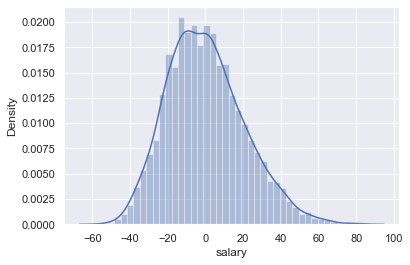

In [48]:
plt.figure(figsize = (6,4))
sns.distplot(y_test-prediction)
plt.show()

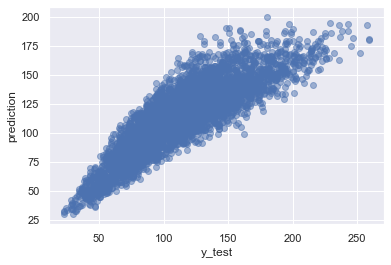

In [49]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 16.3102465163316
MSE: 417.43375497846284
RMSE: 20.43119563262177


In [51]:
metrics.r2_score(y_test, prediction)

0.7294945869263865

## Saving the model

In [52]:
import pickle
# open a file, where you ant to store the data
file = open('rf_salary_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [53]:
model = open('rf_salary_prediction.pkl','rb')
random_forest = pickle.load(model)

In [54]:
rf_pred = random_forest.predict(X_test_new)

In [55]:
metrics.r2_score(y_test, rf_pred)

0.7294945869263865

In [59]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 19134 to 8781
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   yearsExperience         4000 non-null   int64
 1   milesFromMetropolis     4000 non-null   int64
 2   jobType_CFO             4000 non-null   uint8
 3   jobType_CTO             4000 non-null   uint8
 4   jobType_JANITOR         4000 non-null   uint8
 5   jobType_JUNIOR          4000 non-null   uint8
 6   jobType_MANAGER         4000 non-null   uint8
 7   jobType_SENIOR          4000 non-null   uint8
 8   jobType_VICE_PRESIDENT  4000 non-null   uint8
 9   degree_DOCTORAL         4000 non-null   uint8
 10  degree_HIGH_SCHOOL      4000 non-null   uint8
 11  degree_MASTERS          4000 non-null   uint8
 12  degree_NONE             4000 non-null   uint8
 13  major_BUSINESS          4000 non-null   uint8
 14  major_CHEMISTRY         4000 non-null   uint8
 15  major_COMPSCI    